In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import gmaps

### To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(69.093304242877, -61.41321418575258),
 (41.19448927926945, 68.35637527475572),
 (-42.02424407618711, 80.53820100193707),
 (-58.73823819815739, -110.14638997728191),
 (67.53577795503011, -27.426672699278498),
 (59.814538401167425, 92.6661693311575),
 (-26.924172372896464, -27.148420853062447),
 (-6.833150876456216, -52.61264600267634),
 (-62.94935409157088, -171.6459196051311),
 (-26.995724773977265, 29.872744623940775),
 (-26.760594142397252, 7.490377601659333),
 (-46.56434462387823, 171.41260702468708),
 (-47.84739935587426, 25.800184081257783),
 (-56.21731682284622, -0.8490019727702816),
 (68.65619977489652, -89.19987906239898),
 (71.4035272071946, 74.39810649723111),
 (-43.169244442090125, 146.00421016246298),
 (64.01711188521577, 120.43731628302845),
 (-38.73973569401108, 156.0206176452483),
 (24.11853905317311, -54.91786608501825),
 (37.89386418430034, 119.89465140748331),
 (24.853435724642978, -97.31315151557044),
 (-33.81553650746246, 28.813690031951182),
 (-68.76140651574491,

In [4]:
#pip install citipy

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

#### The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [11]:
#cities = ["Pittsburgh","Austin","New York"]

we added another feature to the URL: units=Imperial. There are three unit options: standard, metric, and imperial. 
Temperature is available in Fahrenheit, Celsius and Kelvin units.

* For temperature in Fahrenheit use units=imperial
* For temperature in Celsius use units=metric
* Temperature in Kelvin is used by default, no need to use units parameter in API call

In [7]:
weather_api_key

'b8dcb0cb4b8821b43cb72b6dbb3a2cab'

In [6]:
# When we run the cell, the output will be a URL. Click the URL, and a new window will open in your default web browser. 
# The URL will return a 400 message because we haven't added a city to our URL

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dcb0cb4b8821b43cb72b6dbb3a2cab


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    print(city_url)

If the status_code is something other than 200, JSON data will always be returned in the request. We can determine if the response was successful by checking the status_code, clicking the URL, or retrieving specific information from the JSON data

In [30]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 34 of Set 1 | pangnirtung
Processing Record 35 of Set 1 | ilyich
Processing Record 36 of Set 1 | mahebourg
Processing Record 37 of Set 1 | punta arenas
Processing Record 38 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 39 of Set 1 | teya
Processing Record 40 of Set 1 | vila velha
Processing Record 41 of Set 1 | sao felix do xingu
Processing Record 42 of Set 1 | vaini
Processing Record 43 of Set 1 | volksrust
Processing Record 44 of Set 1 | luderitz
Processing Record 45 of Set 1 | dunedin
Processing Record 46 of Set 1 | kruisfontein
Processing Record 47 of Set 1 | cape town
Processing Record 48 of Set 1 | thompson
Processing Record 49 of Set 1 | pangody
Processing Record 50 of Set 1 | new norfolk
Processing Record 51 of Set 1 | verkhnevilyuysk
Processing Record 52 of Set 1 | ulladulla
Processing Record 53 of Set 1 | codrington
Processing Record 54 of Set 1 | longkou
Processing Record 55 of Set 1 | san fernando
Processing Record 56 of Set 1 | east

Processing Record 40 of Set 4 | soe
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | palana
Processing Record 43 of Set 4 | marsa matruh
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | nelson bay
Processing Record 47 of Set 4 | sept-iles
Processing Record 48 of Set 4 | mahina
Processing Record 49 of Set 4 | caluquembe
Processing Record 50 of Set 4 | orizona
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | yar-sale
Processing Record 3 of Set 5 | vostok
Processing Record 4 of Set 5 | belgrade
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | mandalgovi
Processing Record 7 of Set 5 | muzhi
Processing Record 8 of Set 5 | victoria
Processing Record 9 of Set 5 | comodoro rivadavia
Processing Record 10 of Set 5 | kirakira
Processing Record 11 of Set 5 | vilcun
Processing Record 12 of Set 5 | sadova
Processing Record 13 of Set 5 | premia de mar
Processing Record 1

Processing Record 30 of Set 8 | joacaba
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | mwinilunga
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | le port
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | novikovo
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | honningsvag
Processing Record 39 of Set 8 | carutapera
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 8 | nguiu
City not found. Skipping...
Processing Record 42 of Set 8 | uberlandia
Processing Record 43 of Set 8 | changde
Processing Record 44 of Set 8 | coracora
Processing Record 45 of Set 8 | moa
Processing Record 46 of Set 8 | frosinone
Processing Record 47 of Set 8 | yankton
Processing Record 48 of Set 8 | matina
Processing Record 49 of Set 8 | hornepayne
Processing Record 50 of Set 8 | singuilucan
Processing Record 1 of Set 9 | avera
Processing Record 2 of Set 9 | viedma
Proces

Processing Record 21 of Set 12 | vaitape
Processing Record 22 of Set 12 | zhanaozen
Processing Record 23 of Set 12 | okha
Processing Record 24 of Set 12 | barbacena
Processing Record 25 of Set 12 | pierre
Processing Record 26 of Set 12 | emerald
Processing Record 27 of Set 12 | kijang
Processing Record 28 of Set 12 | bambanglipuro
Processing Record 29 of Set 12 | nikolayevsk-na-amure
Processing Record 30 of Set 12 | sakakah
Processing Record 31 of Set 12 | aasiaat
Processing Record 32 of Set 12 | lolua
City not found. Skipping...
Processing Record 33 of Set 12 | cukai
Processing Record 34 of Set 12 | high level
Processing Record 35 of Set 12 | ahumada
City not found. Skipping...
Processing Record 36 of Set 12 | dharchula
Processing Record 37 of Set 12 | piopio
Processing Record 38 of Set 12 | qui nhon
Processing Record 39 of Set 12 | gigmoto
Processing Record 40 of Set 12 | gangotri
City not found. Skipping...
Processing Record 41 of Set 12 | quelimane
Processing Record 42 of Set 12 | 

In [39]:
city_data

[{'City': 'Pittsburgh',
  'Lat': 40.4406,
  'Lng': -79.9959,
  'Max Temp': 64.15,
  'Humidity': 46,
  'Cloudiness': 0,
  'Wind Speed': 5.75,
  'Country': 'US',
  'Date': '2022-03-21 17:44:11'},
 {'City': 'Austin',
  'Lat': 30.2672,
  'Lng': -97.7431,
  'Max Temp': 75.52,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 16.11,
  'Country': 'US',
  'Date': '2022-03-21 17:47:00'},
 {'City': 'New York',
  'Lat': 40.7143,
  'Lng': -74.006,
  'Max Temp': 61.65,
  'Humidity': 29,
  'Cloudiness': 0,
  'Wind Speed': 17.27,
  'Country': 'US',
  'Date': '2022-03-21 17:43:37'},
 {'City': 'Pittsburgh',
  'Lat': 40.4406,
  'Lng': -79.9959,
  'Max Temp': 64.15,
  'Humidity': 46,
  'Cloudiness': 0,
  'Wind Speed': 5.75,
  'Country': 'US',
  'Date': '2022-03-21 17:44:11'},
 {'City': 'Austin',
  'Lat': 30.2672,
  'Lng': -97.7431,
  'Max Temp': 75.52,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 16.11,
  'Country': 'US',
  'Date': '2022-03-21 17:47:00'},
 {'City': 'New York',
  'Lat': 40.

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        572 non-null    object 
 1   Lat         572 non-null    float64
 2   Lng         572 non-null    float64
 3   Max Temp    572 non-null    float64
 4   Humidity    572 non-null    int64  
 5   Cloudiness  572 non-null    int64  
 6   Wind Speed  572 non-null    float64
 7   Country     572 non-null    object 
 8   Date        572 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 40.3+ KB


In [41]:
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
567,Newport,51.5877,-2.9984,56.68,76,89,7.02,GB,2022-03-21 18:07:12
568,Abu Kamal,34.4506,40.9171,45.23,64,72,10.85,SY,2022-03-21 18:10:59
569,Acoyapa,11.9703,-85.1711,90.72,41,95,20.69,NI,2022-03-21 18:10:59
570,Santana,-0.0583,-51.1817,78.98,100,100,3.44,BR,2022-03-21 18:10:59
571,Malmo,55.6059,13.0007,45.10,45,0,11.03,SE,2022-03-21 18:11:00


In [42]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pittsburgh,40.4406,-79.9959,64.15,46,0,5.75,US,2022-03-21 17:44:11
1,Austin,30.2672,-97.7431,75.52,88,100,16.11,US,2022-03-21 17:47:00
2,New York,40.7143,-74.0060,61.65,29,0,17.27,US,2022-03-21 17:43:37
3,Pittsburgh,40.4406,-79.9959,64.15,46,0,5.75,US,2022-03-21 17:44:11
4,Austin,30.2672,-97.7431,75.52,88,100,16.11,US,2022-03-21 17:47:00


In [43]:
new_column_order = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

(40.0, 110.0)

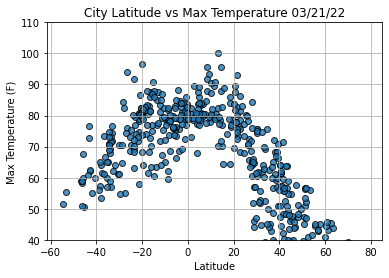

In [46]:
from datetime import date

plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs Max Temperature "+ date.today().strftime("%m/%d/%y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.ylim(40,110,10)

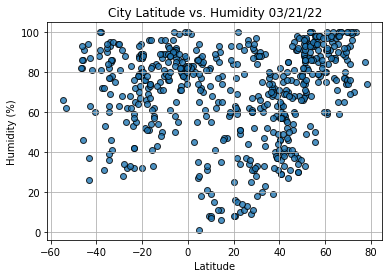

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

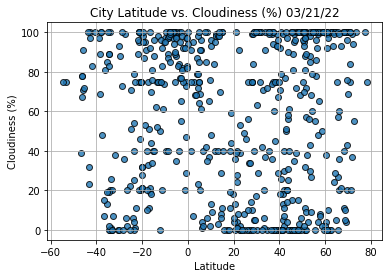

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

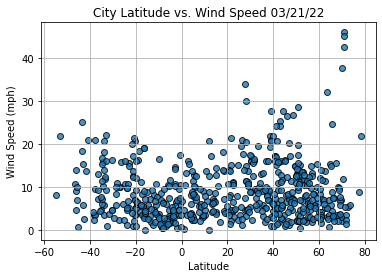

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
      
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
   
    plt.show()
    print(f"R value is: {r_value:.6f}")
    print(f"R2 value is: {r_value**2:.6f}")

In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

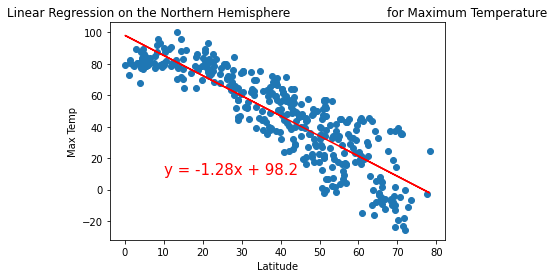

R value is: -0.872590
R2 value is: 0.761413


In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

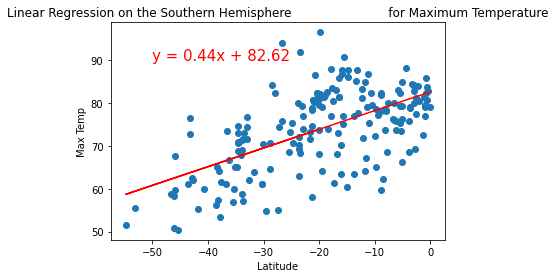

R value is: 0.607349
R2 value is: 0.368873


In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler

### To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, or r-value. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. A correlation coefficient close to zero is no correlation.

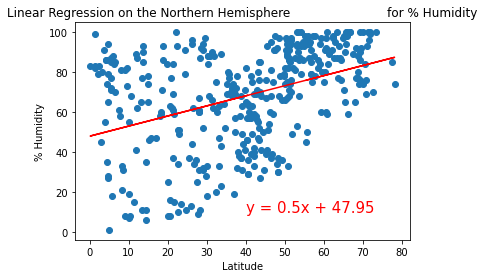

R value is: 0.398662
R2 value is: 0.158932


In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

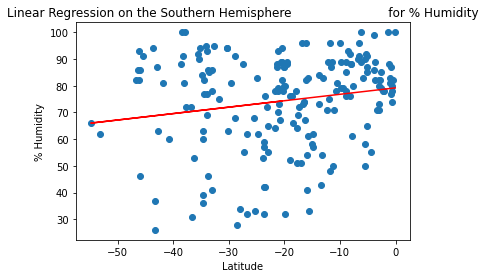

R value is: 0.181008
R2 value is: 0.032764


In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

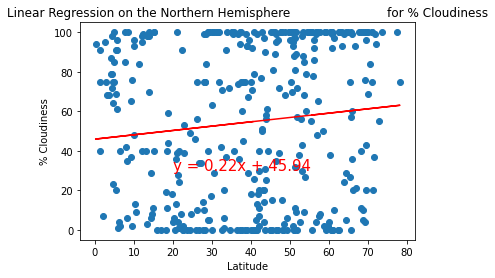

R value is: 0.108233
R2 value is: 0.011714


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,30))

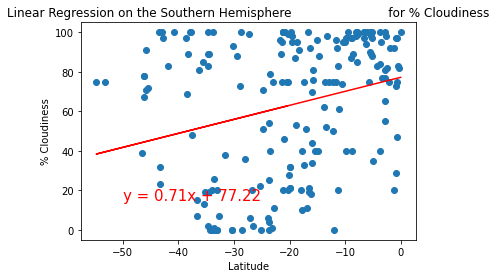

R value is: 0.269691
R2 value is: 0.072733


In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

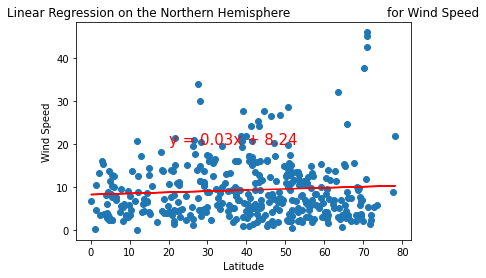

R value is: 0.072950
R2 value is: 0.005322


In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,20))

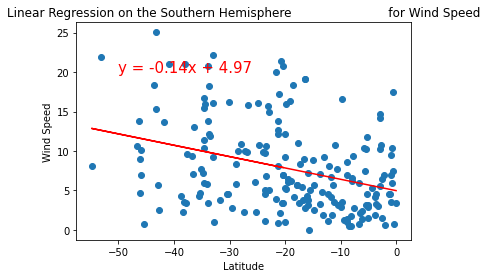

R value is: -0.341012
R2 value is: 0.116289


In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.

In [ ]:
# Import the Google Map API key.
from config import g_key